<a href="https://colab.research.google.com/github/xiaochengJF/MachineLearning/blob/master/1%E3%80%81Linear_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
cd /content/gdrive/My Drive/MachineLearning/ex1-linear regression/

/content/gdrive/My Drive/MachineLearning/ex1-linear regression


In [0]:
import pandas as pd
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="dark")
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [0]:
df = pd.read_csv('ex1data1.txt', names=['population','profit']) # 读取数据，并给定列名

In [60]:
df.head() # 查看前五行数据

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


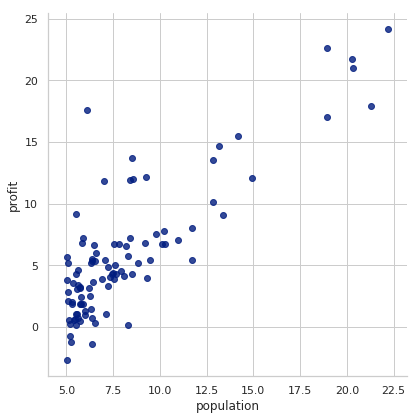

In [63]:
sns.lmplot('population','profit', df, size=6, fit_reg=False)
#plt.show()

In [0]:
def get_X(df): # 读取特征
    """
  
    """
    ones = pd.DataFrame({'ones':np.ones(len(df))}) # ones是m行1列的DataFrame
    data = pd.concat([ones, df],axis = 1) # 合并数据，根据列合并
    return data.iloc[: : -1].as_matrix() # 返回ndarray，不是矩阵

def get_y(df): # 读取标签
    """
    """
    return np.array(df.iloc[:, -1]) # df.iloc[:, -1]是df的最后一列

def normalize_feature(df):
    """
    """
    return df.apply(lambda column: (column.mean()) / column.std()) # 特征缩放

In [0]:
def linear_regression(X_data, y_data, alpha, optimizer=tf.train.GradientDescentOptimizer):
    # 创建占位符
    X = tf.placeholder(tf.float32, shape=X_data.shape)
    y = tf.palceholder(tf.float32, shape=y_data.shape)
    
    # 创建图形
    with tf.variable_scope('linear-regression'):
        W = tf.get_variable("weights",
                            (X_data.shape[1],1),
                            initializer=tf.constant_initializer()) # n*1
        y_pred = tf.matmul(X, W) # m*n @ n*1 -> m*1
        loss = 1 / (2 * len(X_data)) * tf.matmul((y_pred - y), (y_pred - y), transpose_a = True) #  (m*1).T @ m*1 = 1*1
    opt = optimizer(learning_rate=alpha)
    opt_operation = opt.minimize(loss)
    
    # 运行会话
    with th.Session() as sess:
        sess.run(tf.gloabal_variables_initializer())
        loss_data = []
        
        for i in range(epoch):
            _, loss_val, W_val = sess.run([opt_operation, loss, W], feed_dict={X: X_data, y: y_data})
            loss_data.append(loss_val[0,0]) # 每个loss_val 都是1*1 ndarray
            
            if len(loss_data) > 1 and np.abs(loss_data[-1] - loss_data[-2]) < 10 ** -9:# 收敛时提前跳出循环
            #print ("Converged as epoch {}".formaat(i))
                break
    # 清除图
    tf.reset_default_graph()
    return {'loss': loss_data, 'parameters': W_val} # 返回行向量的形式

In [42]:
data = pd.read_csv('ex1data1.txt', names= ['population', 'profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [43]:
X = get_X(data)
print(X.shape, type(X))

y = get_y(data)
print(y.shape, type(y)) # 查看数据维度

(97, 3) <class 'numpy.ndarray'>
(97,) <class 'numpy.ndarray'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [0]:
theta = np.zeros(X.shape[1]) # X.shape[1]=2代表特征数

In [0]:
def lr_cost(theta, X, y):
    """
    """
    m = X.shape[0] # 样本数
    inner = X @ theta - y # R(m*1),等价于X.dot(theta)
    square_sum = inner.T @ inner # .T表示转置
    cost = square_sum / (2 * m)
    
    return cost

In [52]:
lr_cost(theta, X, y) #返回theta的值

32.072733877455676

In [0]:
def gradient(theta, X, y):
    m = X.shape[0]
    inner = X.T @ (X @ theta - y) # (m,n).T @ (m, 1) -> (n, 1)
    
    return inner / m

In [0]:
def batch_gradient_decent(theta,X, y, epoch, alpha=0.01):
    """
    批量梯度下降函数
    拟合线性回归，返回参数和代价
    epoch:批处理次数
    """
    cost_data = [lr_cost(theta, X, y)]
    _theta = theta.copy() # 拷贝
    
    for _theta in range(epoch):
        _theta = _theta - alpha * gradient(_theta, X, y)
        cost_data.append(lr_cost(_theta, X, y))
        
        
    return _theta, cost_data

In [55]:
epoch = 500
final_theta, cost_data = batch_gradient_decent(theta, X, y, epoch)

ValueError: ignored

In [56]:
final_theta

NameError: ignored

In [57]:
cost_data

NameError: ignored

In [64]:
lr_cost(final_theta, X, y)

NameError: ignored

In [65]:
ax = sns.tsplot(cost_data, time=np.arange(epoch=1))
ax.set_xlabel("epoch")
ax.set_ylabel("cost")
plt.show()

NameError: ignored

In [66]:
b = final_theta[0] # intercept,Y轴上的截距
m = final_theta[1] # slope,斜率

plt.scatter(data.population, data.profit, label="Training data")
plt.plot(data.population, data.population*m + b, label="Prediction")
[lt.legend(loc=2)]
plt.show()

NameError: ignored

In [0]:
raw_data = pd.read_cvs("ex1data2.txt", names=['square', 'bedrooms', 'price'])
raw_data.head()

In [0]:
def normalize_feature(df):
    """
    标准化数据
    """
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [68]:
data = normalize_feature(raw_data)
data.head

NameError: ignored

In [69]:
X = get_X(data)
print(X.shape, type(X))

y = get_y(data)
print(y.shape, type(y))#看下数据的维度和类型

(97, 3) <class 'numpy.ndarray'>
(97,) <class 'numpy.ndarray'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [0]:
alpha = 0.01 # 学习率
theta = np.zeros(X.shape[1]) # X.shape[1]：特征数n
epoch = 500 # 轮数

In [72]:
final_theta, cost_data = batch_gradient_decent(theta, X, y, epoch, alpha=alpha)

ValueError: ignored

In [73]:
sns.tsplot(time = np.arange(len(cost_data)), data = cost_data)
plt.xlabel('epoch', fontsize=18)
plt.ylabel('cost', fontsize=18)
plt.show()

NameError: ignored

In [74]:
final_theta

NameError: ignored

In [76]:
base = np.logspace(-1, -5, num=4)
candidate = np.sort(np.concatenate((base, base*3)))
print(candidate)

[1.00000000e-05 3.00000000e-05 2.15443469e-04 6.46330407e-04
 4.64158883e-03 1.39247665e-02 1.00000000e-01 3.00000000e-01]


ValueError: ignored

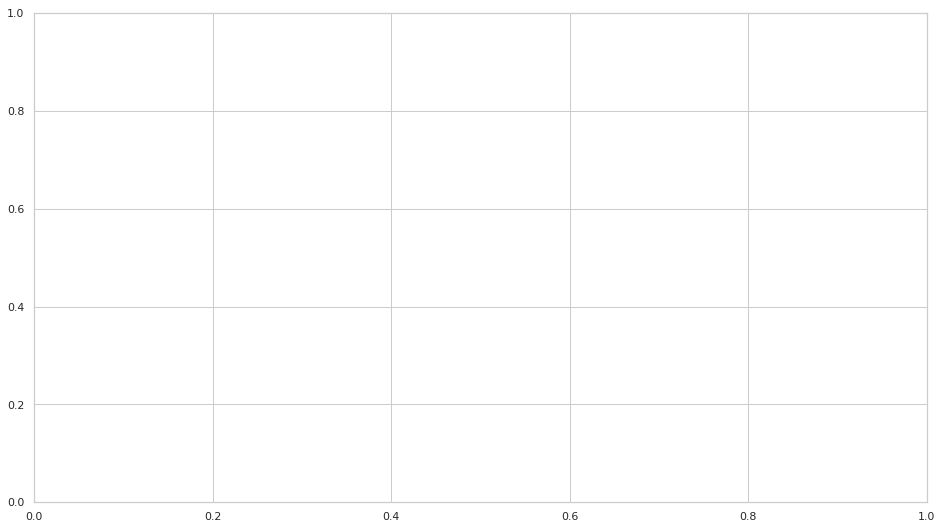

In [77]:
epoch = 50

fig , ax = plt.subplots(figsize = (16, 9))

for alpha in candidate:
    _, cost_data = batch_gradient_decent(theta, X, y, epoch, alpha=alpha)
    ax.plot(np.arange(epoch+1), cost_data, label = alpha)
    
ax.set_xlabel('epoch', fontsize=18)
ax.set_ylabel('cost', fontsize=18)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('learning rate', fontsize=18)
plt.show()

In [0]:
def normalEqn(X, y):
    """
    正规方程
    """
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    
    return theta

In [79]:
final_theta2 = normalEqn(X, y)
final_theta2

array([ 3.49441257,  0.51541009, -0.31869801])

In [80]:
X_data = get_X(data)
print(X_data.shape, type(X_data))

y_data = get_y(data).reshape(len(X_data), 1)
print(y_data.shape, type(y_data))

(97, 3) <class 'numpy.ndarray'>
(97, 1) <class 'numpy.ndarray'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [0]:
epoch = 200
alpha = 0.01

In [82]:
optimizer_dict = {
    'GD' : tf.train.GradientDescentOptimizer,
    'Adagrad': tf.train.AdagradOptimizer,
    'Adam' : tf.train.AdamOptimizer,
    'Ftrl' : tf.train.FtrlOptimizer,
    'RMS' : tf.train.RMSPropOptimizer
}
results = []
for name in optimizer_dict:
    res = linear_regression(X_data, y_data, alphea, epoch, optimizer = optomizer_dict[name])
    res['name'] = name
    results.append(res)

NameError: ignored

In [0]:
fig, ax = plt.subplots(figsize = (16, 9))

for res in results:
    loss_data = res['loss']
    
ax.set_xlabel('epoch', fontsize = 18)
ax.set_ylabel('cost', fontsize = 18)
ax.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
ax.set_title('different optimizer', fontsize = 18)
plt.show()